### Importing necessary Libraries and Loading Data

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Data Cleaning

### Missing Values?

In [138]:
print(customers.isnull().sum().sum())
print(products.isnull().sum().sum())
print(transactions.isnull().sum().sum())

0
0
0


No missing values.

### Duplicates ?

In [139]:
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

0
0
0


No duplicates.

# Data Exploration

### Analysing Customer Signup trends in 4 Continents during 3 consecutive Years

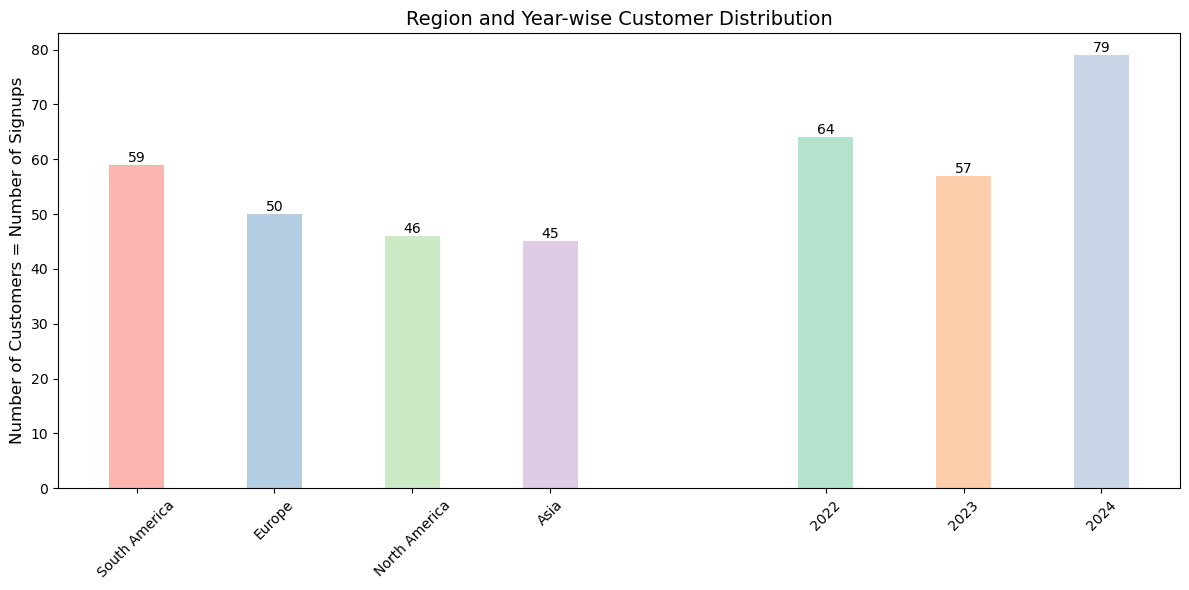

In [140]:
region_counts = customers['Region'].value_counts()

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
year_counts = customers['SignupDate'].dt.year.value_counts().sort_index()

fig, ax1 = plt.subplots(figsize = (12, 6))

bar_width = 0.4
x1 = np.arange(len(region_counts))
x2 = np.arange(len(year_counts)) + len(region_counts) + 1

colors1 = plt.cm.Pastel1(np.arange(len(region_counts)))
ax1.bar(x1, region_counts, width = bar_width, color = colors1, label = 'Regions')

colors2 = plt.cm.Pastel2(np.arange(len(year_counts)))
ax1.bar(x2, year_counts, width = bar_width, color = colors2, label = 'Years')

for index, value in enumerate(region_counts):
    ax1.text(x1[index], value, str(value), ha = 'center', va = 'bottom', fontsize = 10)
for index, value in enumerate(year_counts):
    ax1.text(x2[index], value, str(value), ha = 'center', va = 'bottom', fontsize = 10)

ax1.set_ylabel('Number of Customers = Number of Signups', fontsize = 12)
ax1.set_title('Region and Year-wise Customer Distribution', fontsize = 14)
ax1.set_xticks(np.concatenate([x1, x2]))
ax1.set_xticklabels(list(region_counts.index) + list(year_counts.index.astype(str)), rotation = 45)

plt.tight_layout()
plt.show()

### Analysing Signup trends in every month each year

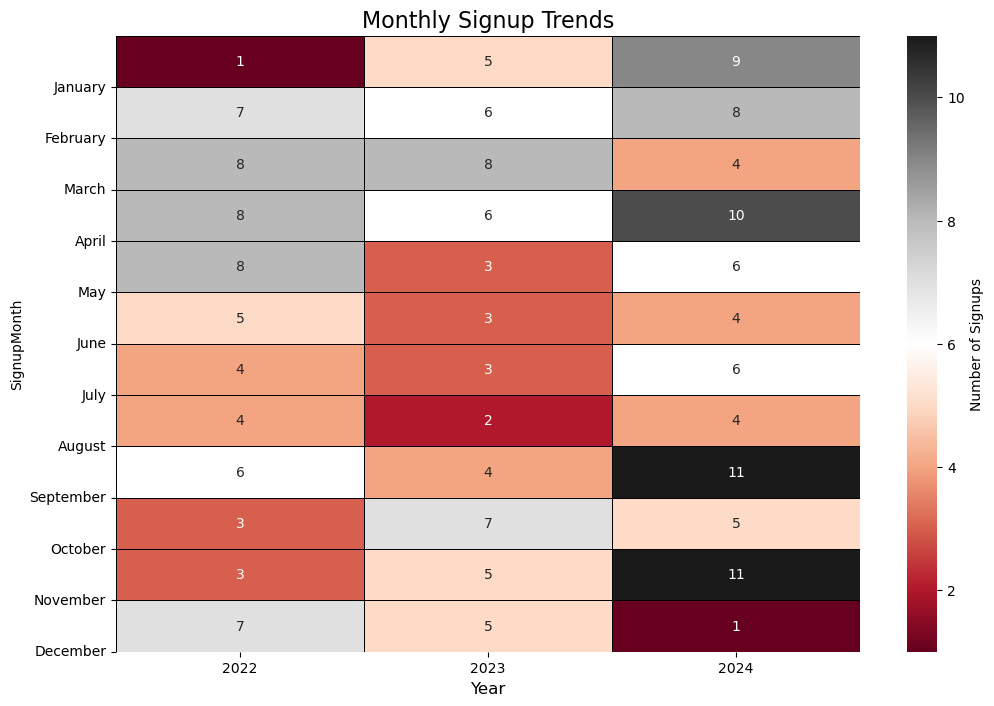

In [141]:
customers['SignupMonth'] = customers['SignupDate'].dt.month
customers['SignupYear'] = customers['SignupDate'].dt.year

pivot_table = customers.pivot_table(index = 'SignupMonth',
                                    columns = 'SignupYear',
                                    aggfunc = 'size',
                                    fill_value = 0)

plt.figure(figsize = (12, 8))
sns.heatmap(pivot_table,
            annot = True,
            fmt = 'd',
            cmap = 'RdGy',
            linewidths = 0.5,
            linecolor = 'black',
            cbar_kws = {'label': 'Number of Signups'})

plt.title('Monthly Signup Trends', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.yticks(rotation = 0,
           ticks = range(1, 13),
           labels = ['January', 'February', 'March', 'April', 'May', 'June',
                     'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

### Weekly Signup Trends

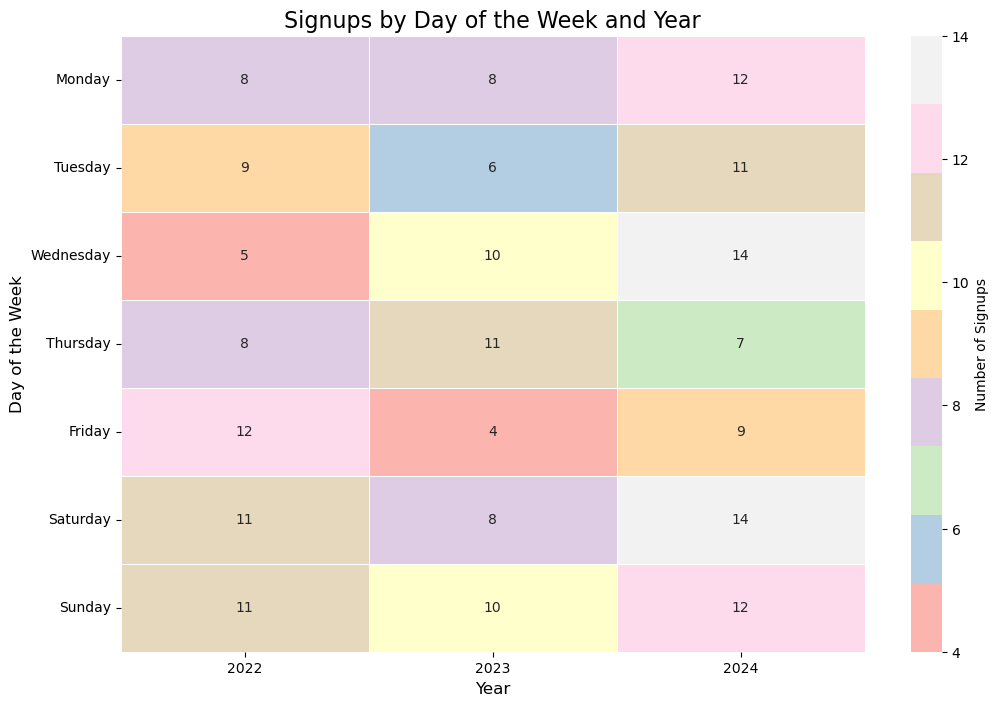

In [142]:
customers['SignupDay'] = customers['SignupDate'].dt.day_name()
pivot_table = customers.pivot_table(index = 'SignupDay',
                                    columns = 'SignupYear',
                                    aggfunc = 'size',
                                    fill_value = 0)

pivot_table = pivot_table.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize = (12, 8))
sns.heatmap(pivot_table,
            annot = True,
            fmt = 'd',
            cmap = 'Pastel1',
            linewidth = 0.5,
            linecolor = 'white',
            cbar_kws = {'label': 'Number of Signups'})

plt.title('Signups by Day of the Week and Year', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Day of the Week', fontsize = 12)
plt.yticks(rotation = 0)
plt.show()

### Increased or Decreased signups Region-wise each Year?

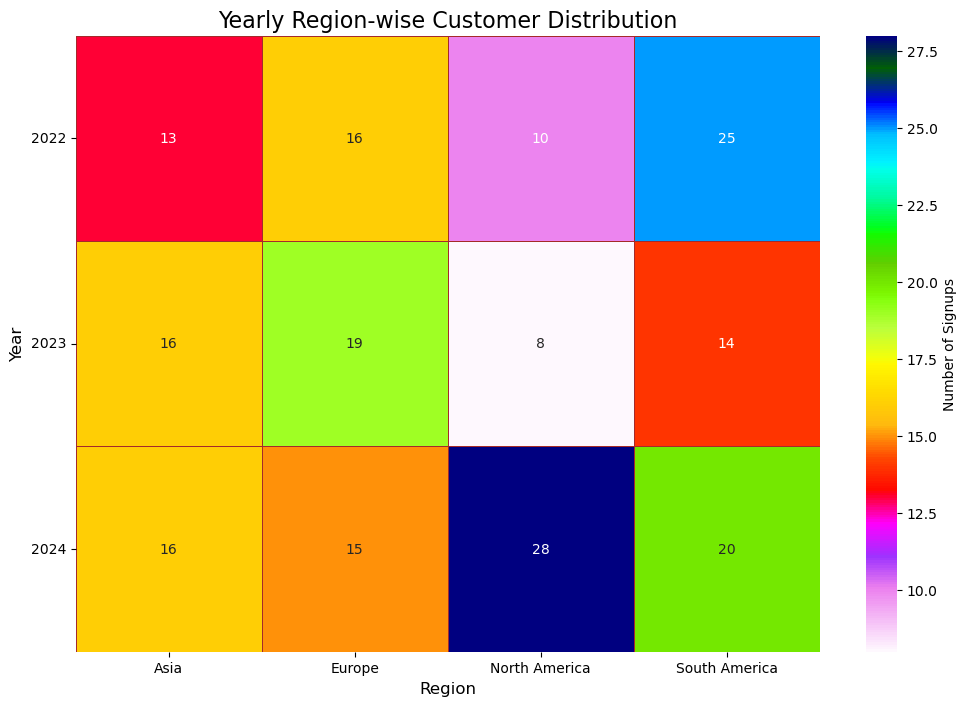

In [143]:
pivot_table = customers.pivot_table(index = 'SignupYear',
                                    columns = 'Region',
                                    aggfunc = 'size',
                                    fill_value = 0)

plt.figure(figsize = (12, 8))
sns.heatmap(pivot_table,
            annot = True,
            fmt = 'd',
            cmap = 'gist_ncar_r',
            linewidths = 0.5,
            linecolor = 'brown',
            cbar_kws = {'label': 'Number of Signups'})

plt.title('Yearly Region-wise Customer Distribution', fontsize = 16)
plt.xlabel('Region', fontsize = 12)
plt.ylabel('Year', fontsize = 12)
plt.yticks(rotation = 0)
plt.show()

### What is the Typical Price of Products in each Category? 

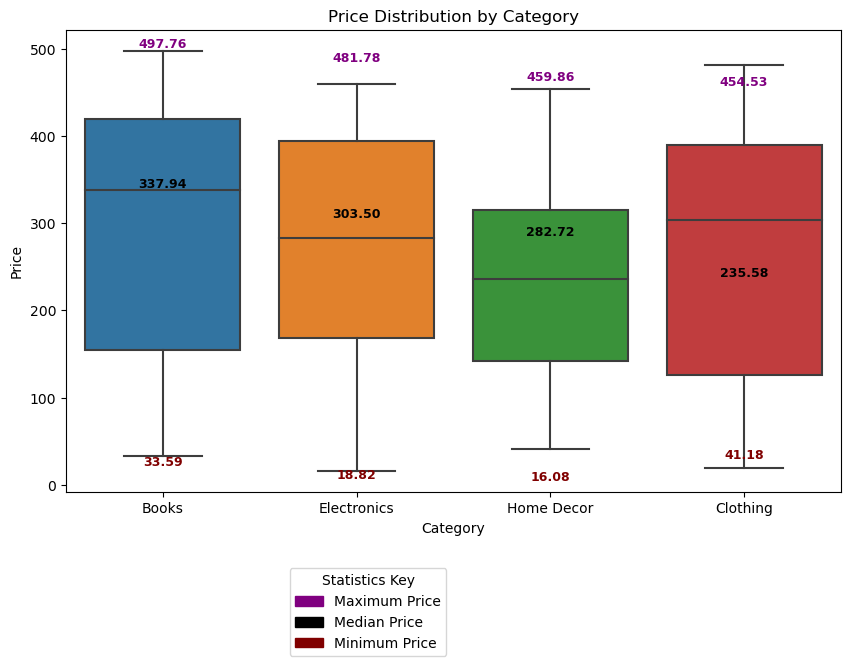

In [144]:
import matplotlib.patches as mpatches
plt.figure(figsize = (10, 6))
sns.boxplot(data = products, x = 'Category', y = 'Price')
plt.title('Price Distribution by Category')

stats = products.groupby('Category')['Price'].agg(['min', 'median', 'max'])

for i, category in enumerate(stats.index):
    min_val = stats.loc[category, 'min']
    median_val = stats.loc[category, 'median']
    max_val = stats.loc[category, 'max']

    plt.text(i, min_val, f'{min_val:.2f}', ha = 'center', va = 'top', color = 'maroon', fontsize = 9, weight = 'bold')
    plt.text(i, median_val, f'{median_val:.2f}', ha = 'center', va = 'bottom', color = 'black', fontsize = 9, weight = 'bold')
    plt.text(i, max_val, f'{max_val:.2f}', ha = 'center', va = 'bottom', color = 'purple', fontsize = 9, weight = 'bold')

plt.xlabel('Category')
plt.ylabel('Price')

min_patch = mpatches.Patch(color = 'maroon', label = 'Minimum Price')
median_patch = mpatches.Patch(color = 'black', label = 'Median Price')
max_patch = mpatches.Patch(color = 'purple', label = 'Maximum Price')

plt.legend(handles = [max_patch, median_patch, min_patch],
           loc = 'best',
           bbox_to_anchor = (0.5, -0.15),
           fontsize = 10,
           title = 'Statistics Key')

plt.show()

### What are the Top 10 Revenue-Generating Products (with Category mentioned)?

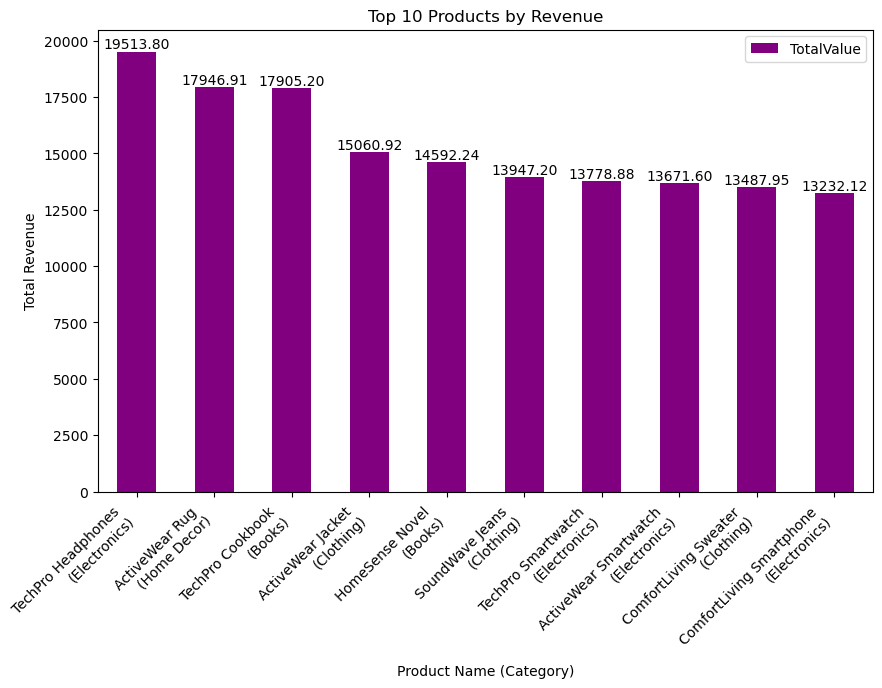

In [145]:
top_products = transactions.groupby('ProductID')['TotalValue'].sum().nlargest(10)

top_products_names = top_products.reset_index()
top_products_names = top_products_names.merge(products[['ProductID', 'ProductName']], on = 'ProductID', how = 'left')
top_products_names = top_products_names.merge(products[['ProductID', 'Category']], on = 'ProductID', how = 'left')

top_products_names['ProductLabel'] = top_products_names['ProductName'] + ' \n(' + top_products_names['Category'] + ')'

fig = top_products_names.plot(kind = 'bar',
                        x = 'ProductLabel',
                        y = 'TotalValue',
                        color = 'purple',
                        title = 'Top 10 Products by Revenue',
                        figsize = (10, 6))

for index, value in enumerate(top_products_names['TotalValue']):
    fig.text(index, value + 0.1, f'{value:.2f}', ha = 'center', va = 'bottom', fontsize = 10)

plt.xlabel('Product Name (Category)')
plt.ylabel('Total Revenue')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

### Which Category generates the Highest Total Revenue?

C:\Users\cheta\AppData\Local\Temp\ipykernel_31848\1112448761.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_revenue_labels.loc[:, 'Label'] = category_revenue_labels['Category'] + ' \n(' + category_revenue_labels['ProductName'] + " \n(" + category_revenue_labels['TotalValue'].astype(str) + '))'


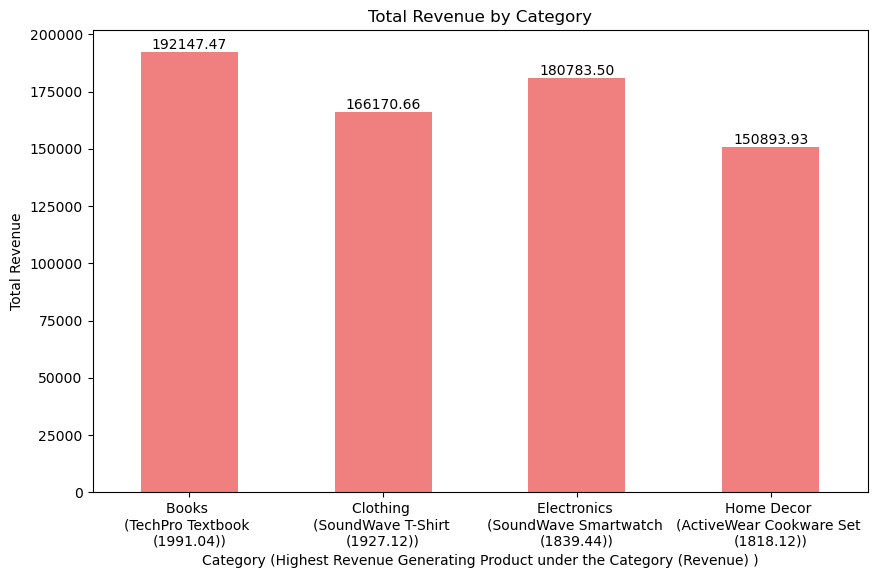

In [146]:
merged_data = transactions.merge(products[['ProductID', 'Category']], on = 'ProductID', how = 'left')

category_revenue = merged_data.groupby('Category')['TotalValue'].sum()

highest_revenue_products = merged_data.loc[merged_data.groupby('Category')['TotalValue'].idxmax()]
highest_revenue_products = highest_revenue_products.merge(products[['ProductID', 'ProductName']], on = 'ProductID', how = 'left')

category_revenue_labels = highest_revenue_products[['Category', 'ProductName', 'TotalValue']]

category_revenue_labels.loc[:, 'Label'] = category_revenue_labels['Category'] + ' \n(' + category_revenue_labels['ProductName'] + " \n(" + category_revenue_labels['TotalValue'].astype(str) + '))'

fig = category_revenue.plot(kind = 'bar', color = 'lightcoral', title = 'Total Revenue by Category', figsize = (10, 6))

for i, value in enumerate(category_revenue):
    fig.text(i, value + 0.1, f'{value:.2f}', ha = 'center', va = 'bottom', fontsize = 10)

plt.xlabel('Category (Highest Revenue Generating Product under the Category (Revenue) )')
plt.ylabel('Total Revenue')
plt.xticks(ticks = range(len(category_revenue)),
           labels = category_revenue_labels['Label'],
           rotation = 0,
           ha = 'center')
plt.show()

In [147]:
total_revenue = transactions['TotalValue'].sum()
print(f'Total Revenue: ${total_revenue}')

Total Revenue: $689995.56
